In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load your dataset
data = pd.read_csv('Temp Plot(2).csv')

In [4]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C
0,10/3/2016,0.00,25.567,26.171,75.9,24.388889
1,10/4/2016,0.00,25.713,26.100,78.6,25.888889
2,10/5/2016,0.06,25.946,26.100,82.6,28.111111
3,10/6/2016,0.39,26.446,26.158,82.8,28.222222
4,10/7/2016,0.00,26.663,26.300,72.3,22.388889


In [5]:
data.tail()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C
1160,12/7/2019,0.00,15.429,16.700,NaN,NaN
1161,12/8/2019,0.00,15.346,16.700,NaN,NaN
1162,12/9/2019,0.32,15.329,16.625,NaN,NaN
1163,12/10/2019,0.00,15.558,16.650,NaN,NaN
1164,12/11/2019,NaN,15.331,16.694,NaN,NaN


In [6]:
data.shape

(1165, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1165 non-null   object 
 1   Rainfall(inch)     1164 non-null   float64
 2   Temperature(0.9m)  1153 non-null   float64
 3   Temperature(1.8m)  812 non-null    float64
 4   Air Temp F         1154 non-null   float64
 5   Air Temp C         1154 non-null   float64
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [8]:
data.describe()

,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C
count,1164.000000,1153.000000,812.000000,1154.000000,1154.000000
mean,0.071375,20.592140,21.291655,68.545061,20.302811
std,0.252763,5.890783,4.989298,15.818195,8.787886
min,0.000000,8.504000,11.200000,23.200000,-4.888889
25%,0.000000,15.467000,17.126750,56.625000,13.680556
50%,0.000000,20.271000,20.635500,70.450000,21.361111
75%,0.000000,25.983000,25.717750,82.400000,28.000000
max,4.140000,30.808000,29.700000,97.000000,36.111111


In [9]:
data.isnull().sum()

Date                   0
Rainfall(inch)         1
Temperature(0.9m)     12
Temperature(1.8m)    353
Air Temp F            11
Air Temp C            11
dtype: int64

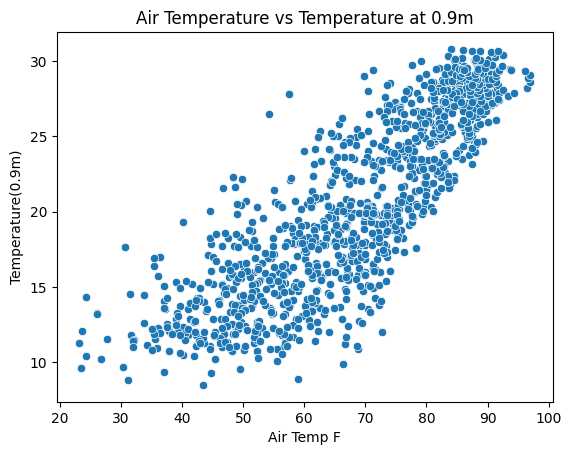

In [10]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Air Temp F'], y=data['Temperature(0.9m)'])
plt.title('Air Temperature vs Temperature at 0.9m')
plt.show()

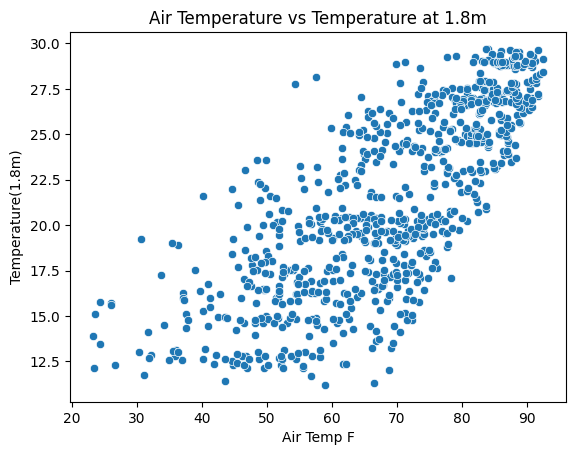

In [11]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Air Temp F'], y=data['Temperature(1.8m)'])
plt.title('Air Temperature vs Temperature at 1.8m')
plt.show()

#### Feature Engineering

In [12]:
#Handling Missing values
# Mean imputation for missing values
data['Rainfall(inch)'].fillna(data['Rainfall(inch)'].mean(), inplace=True)
data['Temperature(0.9m)'].fillna(data['Temperature(0.9m)'].mean(), inplace=True)
data['Temperature(1.8m)'].fillna(data['Temperature(1.8m)'].mean(), inplace=True)
data['Air Temp F'].fillna(data['Air Temp F'].mean(), inplace=True)
data['Air Temp C'].fillna(data['Air Temp C'].mean(), inplace=True)


In [13]:
data.isnull().sum()

Date                 0
Rainfall(inch)       0
Temperature(0.9m)    0
Temperature(1.8m)    0
Air Temp F           0
Air Temp C           0
dtype: int64

In [14]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C
0,10/3/2016,0.00,25.567,26.171,75.9,24.388889
1,10/4/2016,0.00,25.713,26.100,78.6,25.888889
2,10/5/2016,0.06,25.946,26.100,82.6,28.111111
3,10/6/2016,0.39,26.446,26.158,82.8,28.222222
4,10/7/2016,0.00,26.663,26.300,72.3,22.388889


In [15]:
#Handling Date Column

data['Date'] = pd.to_datetime(data['Date'])
data['day_of_year'] = data['Date'].dt.dayofyear

In [16]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C,day_of_year
0,2016-10-03,0.00,25.567,26.171,75.9,24.388889,277
1,2016-10-04,0.00,25.713,26.100,78.6,25.888889,278
2,2016-10-05,0.06,25.946,26.100,82.6,28.111111,279
3,2016-10-06,0.39,26.446,26.158,82.8,28.222222,280
4,2016-10-07,0.00,26.663,26.300,72.3,22.388889,281


In [17]:
#segregatting independent and dependent variables
X = data[['day_of_year', 'Rainfall(inch)', 'Air Temp F', 'Air Temp C']]
y = data[['Temperature(0.9m)', 'Temperature(1.8m)']]


In [18]:
X.head() #Independent Features

,day_of_year,Rainfall(inch),Air Temp F,Air Temp C
0,277,0.00,75.9,24.388889
1,278,0.00,78.6,25.888889
2,279,0.06,82.6,28.111111
3,280,0.39,82.8,28.222222
4,281,0.00,72.3,22.388889


In [19]:
y.head() #Target Features

,Temperature(0.9m),Temperature(1.8m)
0,25.567,26.171
1,25.713,26.100
2,25.946,26.100
3,26.446,26.158
4,26.663,26.300


In [20]:
#Spliting train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
X.shape,X_train.shape,X_test.shape

((1165, 4), (932, 4), (233, 4))

In [22]:
X_train

,day_of_year,Rainfall(inch),Air Temp F,Air Temp C
810,356,0.00,54.5,12.500000
533,79,0.00,54.7,12.611111
964,145,0.00,82.3,27.944444
602,148,0.00,85.8,29.888889
803,349,0.00,48.6,9.222222
...,...,...,...,...
1044,225,0.20,92.4,33.555556
1095,276,0.00,86.6,30.333333
1130,311,0.00,59.2,15.111111
860,41,0.25,39.0,3.888889


In [23]:
#Starndardization (Scaling the data)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[ 1.5390215 , -0.28403316, -0.88403365, -0.88403365],
       [-1.06975944, -0.28403316, -0.87145517, -0.87145517],
       [-0.44817265, -0.28403316,  0.86437498,  0.86437498],
       ...,
       [ 1.11521232, -0.28403316, -0.58843938, -0.58843938],
       [-1.42764275,  0.63282008, -1.85886579, -1.85886579],
       [ 1.07754039, -0.28403316, -1.02239692, -1.02239692]])

In [25]:
X_test

array([[ 9.83360577e-01,  9.26213113e-01, -7.90109679e-02,
        -7.90109680e-02],
       [-1.64425633e+00, -2.84033164e-01, -1.22365259e+00,
        -1.22365259e+00],
       [-9.75579626e-01, -2.84033164e-01, -5.00390025e-01,
        -5.00390025e-01],
       [-1.05092348e+00, -2.47359034e-01, -2.73977398e-01,
        -2.73977397e-01],
       [ 7.19657088e-01, -1.74010775e-01,  2.98343412e-01,
         2.98343412e-01],
       [ 2.48758001e-01, -2.84033164e-01,  9.14688899e-01,
         9.14688899e-01],
       [ 1.45425966e+00, -2.84033164e-01, -1.07900007e+00,
        -1.07900007e+00],
       [-9.19071736e-01,  1.43965093e+00, -9.78786869e-02,
        -9.78786874e-02],
       [-1.19219321e+00, -2.84033164e-01, -4.75647696e-02,
        -4.75647694e-02],
       [-2.03305123e-01, -2.84033164e-01,  9.65002817e-01,
         9.65002816e-01],
       [ 1.35066186e+00, -2.84033164e-01, -7.51959612e-01,
        -7.51959612e-01],
       [ 9.45688650e-01, -2.84033164e-01,  2.60607974e-01,
      

#### ANN Model

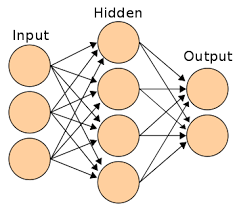

In [26]:
#importing libraries for ANN Model

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
# Defining the ANN model

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #HL1 connected with IP layer
model.add(Dense(64, activation='relu')) #Hidden layer2
model.add(Dense(2))  # Output layer for two temperatures


In [28]:
#Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,026 (35.26 KB)

 Trainable params: 9,026 (35.26 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the neural network model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [30]:
#train model
history = model.fit(X_train, y_train, epochs=50, batch_size=30, validation_split=0.1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.5363 - loss: 440.7912 - val_accuracy: 0.6064 - val_loss: 407.5536
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5340 - loss: 373.9443 - val_accuracy: 0.6064 - val_loss: 267.8357
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5351 - loss: 208.4742 - val_accuracy: 0.6064 - val_loss: 88.0980
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5404 - loss: 66.4340 - val_accuracy: 0.6064 - val_loss: 31.4699
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6284 - loss: 32.5146 - val_accuracy: 0.8723 - val_loss: 25.8369
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 26.3133 - val_accuracy: 0.8723 - val_loss: 22.6094
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 25.4403 - val_accuracy: 0.8723 - val_loss: 20.0508
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8613 - loss: 21.6413 - val_accura

In [33]:
#prediction
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
accuracy = r2_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7156755924224854


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Evaluate the model
mse_0_9 = mean_squared_error(y_test['Temperature(0.9m)'], y_pred[:, 0])
mse_1_8 = mean_squared_error(y_test['Temperature(1.8m)'], y_pred[:, 1])
mae_0_9 = mean_absolute_error(y_test['Temperature(0.9m)'], y_pred[:, 0])
mae_1_8 = mean_absolute_error(y_test['Temperature(1.8m)'], y_pred[:, 1])
r2_0_9 = r2_score(y_test['Temperature(0.9m)'], y_pred[:, 0])
r2_1_8 = r2_score(y_test['Temperature(1.8m)'], y_pred[:, 1])

In [36]:
# Print evaluation metrics
print(f'MSE for Temperature(0.9m): {mse_0_9}')
print(f'MSE for Temperature(1.8m): {mse_1_8}')
print(f'MAE for Temperature(0.9m): {mae_0_9}')
print(f'MAE for Temperature(1.8m): {mae_1_8}')
print(f'R^2 Score for Temperature(0.9m): {r2_0_9}')
print(f'R^2 Score for Temperature(1.8m): {r2_1_8}')


MSE for Temperature(0.9m): 4.804052736678521
MSE for Temperature(1.8m): 6.616039984182423
MAE for Temperature(0.9m): 1.624292643512997
MAE for Temperature(1.8m): 2.0627045587187114
R^2 Score for Temperature(0.9m): 0.8474381201287563
R^2 Score for Temperature(1.8m): 0.5839132095606394


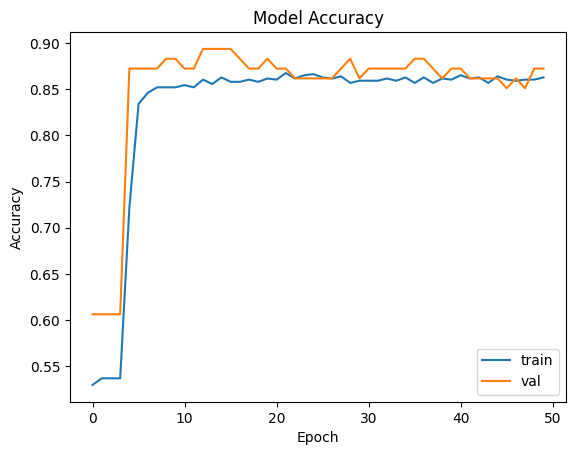

In [48]:
#Visualize
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='lower right')
plt.show()

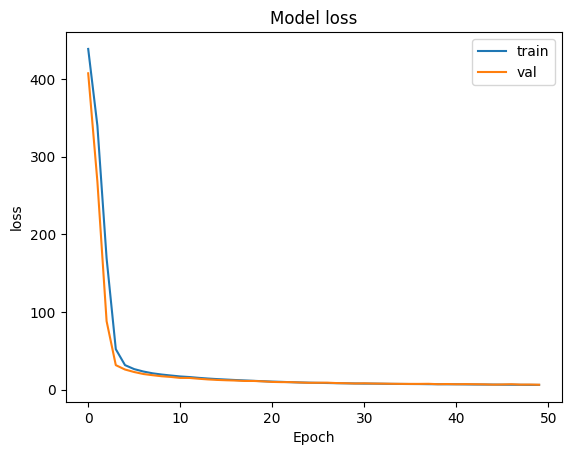

In [49]:
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper right')
plt.show()

In [39]:
import joblib

# Save the scaler and model
joblib.dump(scaler, 'scaler.pkl')
model.save('temperature_predictor.h5')


In [40]:
# Create a function for making predictions
def predict_temperature(): #day_of_year, rainfall, air_temp_f, air_temp_c
    day_of_year = int(input('Enter the Day_of_year: '))
    rainfall = float(input('Enter rainfall(inch): '))
    air_temp_f = float(input('Enter the air temp F: '))
    air_temp_c = float(input('Enter the air temp C: '))
    input_data = np.array([[day_of_year, rainfall, air_temp_f, air_temp_c]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return prediction[0]  # Returns predictions for both temperatures


In [42]:

# Example usage of the prediction function
predicted_temperatures = predict_temperature() #150, 0.5, 75, 24
print(f'Predicted Temperatures: 0.9m: {predicted_temperatures[0]}, 1.8m: {predicted_temperatures[1]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Temperatures: 0.9m: 21.132858276367188, 1.8m: 20.502931594848633


In [43]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C,day_of_year
0,2016-10-03,0.00,25.567,26.171,75.9,24.388889,277
1,2016-10-04,0.00,25.713,26.100,78.6,25.888889,278
2,2016-10-05,0.06,25.946,26.100,82.6,28.111111,279
3,2016-10-06,0.39,26.446,26.158,82.8,28.222222,280
4,2016-10-07,0.00,26.663,26.300,72.3,22.388889,281


In [44]:
def predict_temperature(day_of_year, rainfall, air_temp_f, air_temp_c): #
    input_data = np.array([[day_of_year, rainfall, air_temp_f, air_temp_c]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return prediction[0]

predicted_temperatures = predict_temperature(4.08863690e-01,-2.84033164e-01,1.09078761e+00,1.09078761e+00)
print(f'Predicted Temperatures: 0.9m: {predicted_temperatures[0]}, 1.8m: {predicted_temperatures[1]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted Temperatures: 0.9m: 14.628252983093262, 1.8m: 20.939781188964844


In [45]:
X_test

array([[ 9.83360577e-01,  9.26213113e-01, -7.90109679e-02,
        -7.90109680e-02],
       [-1.64425633e+00, -2.84033164e-01, -1.22365259e+00,
        -1.22365259e+00],
       [-9.75579626e-01, -2.84033164e-01, -5.00390025e-01,
        -5.00390025e-01],
       [-1.05092348e+00, -2.47359034e-01, -2.73977398e-01,
        -2.73977397e-01],
       [ 7.19657088e-01, -1.74010775e-01,  2.98343412e-01,
         2.98343412e-01],
       [ 2.48758001e-01, -2.84033164e-01,  9.14688899e-01,
         9.14688899e-01],
       [ 1.45425966e+00, -2.84033164e-01, -1.07900007e+00,
        -1.07900007e+00],
       [-9.19071736e-01,  1.43965093e+00, -9.78786869e-02,
        -9.78786874e-02],
       [-1.19219321e+00, -2.84033164e-01, -4.75647696e-02,
        -4.75647694e-02],
       [-2.03305123e-01, -2.84033164e-01,  9.65002817e-01,
         9.65002816e-01],
       [ 1.35066186e+00, -2.84033164e-01, -7.51959612e-01,
        -7.51959612e-01],
       [ 9.45688650e-01, -2.84033164e-01,  2.60607974e-01,
      

In [46]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C,day_of_year
0,2016-10-03,0.00,25.567,26.171,75.9,24.388889,277
1,2016-10-04,0.00,25.713,26.100,78.6,25.888889,278
2,2016-10-05,0.06,25.946,26.100,82.6,28.111111,279
3,2016-10-06,0.39,26.446,26.158,82.8,28.222222,280
4,2016-10-07,0.00,26.663,26.300,72.3,22.388889,281
